In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from mlxtend.plotting.decision_regions import plot_decision_regions

In [2]:
#Data Preparation
iris=load_iris() # Extract the data and target arrays from the dataset
Data=iris.data
S=len(Data)
All_Data=np.zeros([S,5])
All_Data[:,0:4]=Data
All_Data[:,-1]=iris.target

Df=pd.DataFrame(All_Data)
Df=Df.rename(columns = {0:"sepal length",1:"sepal width",2:"petal length",3:"petal width",4:"Target"})
Df.head(10)
Y=Df.Target.to_numpy()
X=Df[["sepal length","sepal width","petal length","petal width"]].to_numpy()
# Split the data into training and testing sets
train_data,test_data,train_targets,test_targets = train_test_split(X, Y, test_size=0.1, train_size=0.9,random_state=155)
# Split the training and testing sets into sepal and petal features
petal_train=train_data[:, 2:]
sepal_train=train_data[:,:2]
petal_test=test_data[:, 2:]
sepal_test=test_data[:,:2]


In [3]:

class log_Regression:
    def __init__(self,a=0.01,it=1000):
        self.a=a
        self.it=it
    def fit(self, inp, tar):
         #Fit the logistic regression model with the normal equation
        inp=np.c_[np.ones((inp.shape[0], 1)), inp]
        self.t=np.linalg.inv(inp.T.dot(inp)).dot(inp.T).dot(tar)
    def predict(self, X):
            X=np.c_[np.ones((X.shape[0], 1)), X]
            y_pred_proba=self.sigmoid(X @ self.t)
            y_pred=np.where(y_pred_proba >= 0.5, 1, 0)
            return y_pred
    def sigmoid(self, z):  #sigmoid fuction
        return 1.0 / (1.0 + np.exp(-z))


In [4]:
petal=log_Regression()
sepal=log_Regression()
all=log_Regression()
petal.fit(petal_train, train_targets)
sepal.fit(sepal_train, train_targets)
all.fit(train_data, train_targets)

In [5]:
log_petal=petal.predict(petal_test)
log_sepal=sepal.predict(sepal_test)
log_all=all.predict(test_data)

print("accuracy  petal length/width=",np.mean(log_petal==test_targets))
print("accuracy sepal length/width=",np.mean(log_sepal==test_targets))
print("accuracy all=",np.mean(log_all==test_targets))



accuracy  petal length/width= 0.8
accuracy sepal length/width= 0.4666666666666667
accuracy all= 0.8


Text(0.5, 1.0, 'Logistic Regression on Iris')

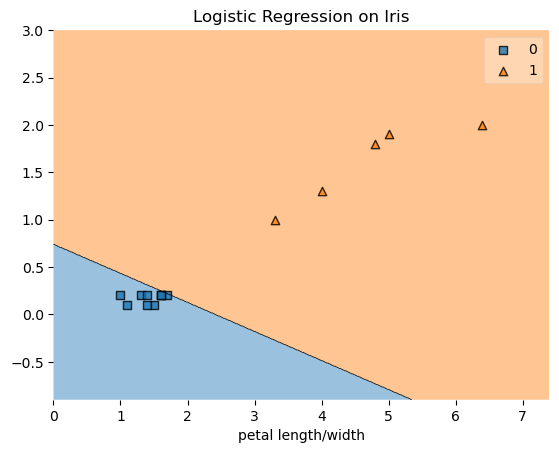

In [6]:
figr=plt.figure()
ax=plot_decision_regions(petal_test, log_petal, petal)
figr.add_subplot(ax)
plt.xlabel('petal length/width')
plt.title('Logistic Regression on Iris')

Text(0.5, 1.0, 'Logistic Regression on Iris')

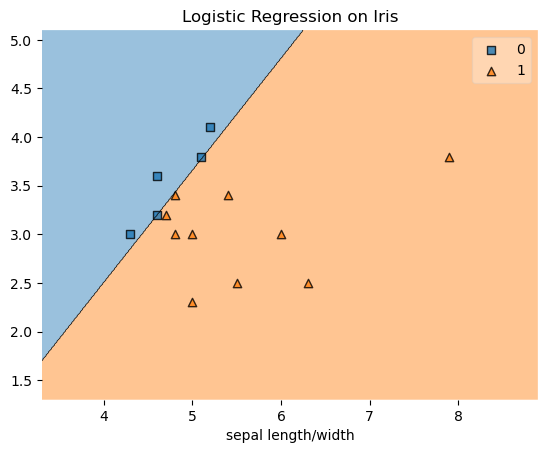

In [7]:
figr2=plt.figure()
ax2=plot_decision_regions(sepal_test,log_sepal, sepal)
figr2.add_subplot(ax2)
plt.xlabel('sepal length/width')
plt.title('Logistic Regression on Iris')

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 


LDA_petal=LinearDiscriminantAnalysis()
LDA_petal.fit(petal_train, train_targets)

LDA_sepal=LinearDiscriminantAnalysis()
LDA_sepal.fit(sepal_train, train_targets)

LDA_all=LinearDiscriminantAnalysis()
LDA_all.fit(train_data, train_targets)


LinearDiscriminantAnalysis()

# Testing 

In [9]:
lda_pred_petal=LDA_petal.predict(petal_test).astype(int)
lda_pred_sepal=LDA_sepal.predict(sepal_test).astype(int)
lda_pred_all=LDA_all.predict(test_data).astype(int)

In [10]:

print("accuracy petal length/width =",np.mean(lda_pred_petal==test_targets))
print("accuracy sepal length/width=",np.mean(lda_pred_sepal==test_targets))
print("accuracy all=",np.mean(lda_pred_all==test_targets))



accuracy petal length/width = 1.0
accuracy sepal length/width= 0.9333333333333333
accuracy all= 1.0


# visualizations of the classifier using plot_decision_regions from mlxtend

Text(0.5, 1.0, 'Logistic Regression on Iris')

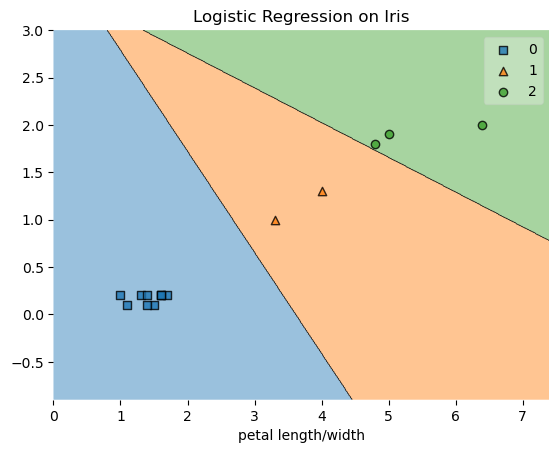

In [12]:
figr3=plt.figure()
ax=plot_decision_regions(petal_test, lda_pred_petal, LDA_petal)
figr3.add_subplot(ax)
plt.xlabel('petal length/width')
plt.title('Logistic Regression on Iris')

Text(0.5, 1.0, 'Logistic Regression on Iris')

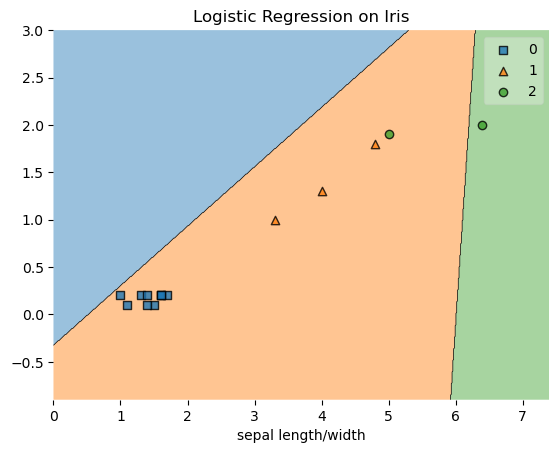

In [13]:
figr4 =plt.figure()
ax=plot_decision_regions(petal_test, lda_pred_sepal, LDA_sepal)
figr4.add_subplot(ax)
plt.xlabel('sepal length/width')
plt.title('Logistic Regression on Iris')

| Accuracy               | Logistic Regression          | Linear Discriminant Analysis |
| ---------------------- | ---------------------------- |  ----------------------------
|  petal length/width    |0.8                           | 1.0                          |
|  sepal length/width    |0.4666666666666667            | 0.9333333333333333           |
|   All                  | 0.8                          | 1.0                          |